In [1]:
from data_generator import vis_train_features

# extract label and audio features for a single training example
vis_text, vis_raw_audio, vis_mfcc_feature, vis_spectrogram_feature, vis_audio_path = vis_train_features()

There are 2136 total training examples.


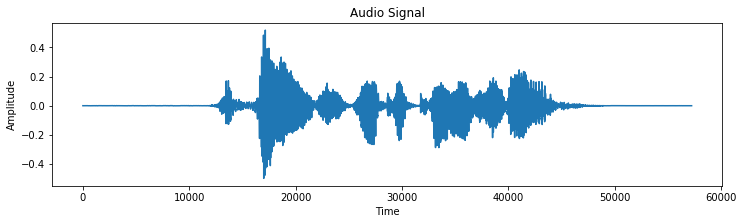

**Shape of Audio Signal** : (57220,)

**Transcript** : advance into tennessee

In [2]:
from IPython.display import Markdown, display
from data_generator import vis_train_features, plot_raw_audio
from IPython.display import Audio
%matplotlib inline

# plot audio signal
plot_raw_audio(vis_raw_audio)
# print length of audio signal
display(Markdown('**Shape of Audio Signal** : ' + str(vis_raw_audio.shape)))
# print transcript corresponding to audio clip
display(Markdown('**Transcript** : ' + str(vis_text)))
# play the audio file
Audio(vis_audio_path)


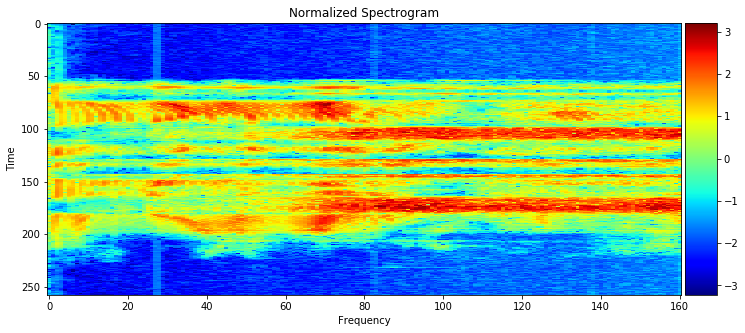

**Shape of Spectrogram** : (258, 161)

In [3]:
from data_generator import plot_spectrogram_feature

# plot normalized spectrogram
plot_spectrogram_feature(vis_spectrogram_feature)
# print shape of spectrogram
display(Markdown('**Shape of Spectrogram** : ' + str(vis_spectrogram_feature.shape)))

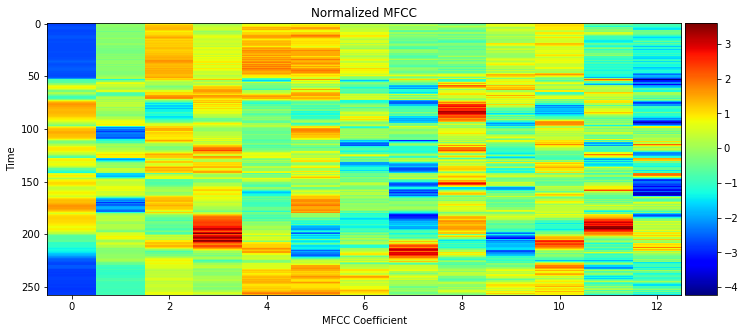

**Shape of MFCC** : (258, 13)

In [4]:
from data_generator import plot_mfcc_feature

# plot normalized MFCC
plot_mfcc_feature(vis_mfcc_feature)
# print shape of MFCC
display(Markdown('**Shape of MFCC** : ' + str(vis_mfcc_feature.shape)))

In [5]:
#####################################################################
# RUN THIS CODE CELL IF YOU ARE RESUMING THE NOTEBOOK AFTER A BREAK #
#####################################################################

# allocate 50% of GPU memory (if you like, feel free to change this)
from keras.backend.tensorflow_backend import set_session
import tensorflow as tf 
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
set_session(tf.Session(config=config))

# watch for any changes in the sample_models module, and reload it automatically
%load_ext autoreload
%autoreload 2
# import NN architectures for speech recognition
from sample_models import *
# import function for training acoustic model
from train_utils import train_model

Using TensorFlow backend.


In [6]:
model = model(input_dim=161, # change to 13 if you would like to use MFCC features
                         units=200,
                         recur_layers=7) 

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
the_input (InputLayer)       (None, None, 161)         0         
_________________________________________________________________
rnn_1 (GRU)                  (None, None, 200)         217200    
_________________________________________________________________
rnn_2 (GRU)                  (None, None, 200)         240600    
_________________________________________________________________
bn_0 (BatchNormalization)    (None, None, 200)         800       
_________________________________________________________________
rnn_3 (GRU)                  (None, None, 200)         240600    
_________________________________________________________________
bn_1 (BatchNormalization)    (None, None, 200)         800    

In [7]:
train_model(input_to_softmax=model, 
            pickle_path='model.pickle', 
            save_model_path='model.h5', 
            spectrogram=True) # change to False if you would like to use MFCC features

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Epoch 1/20
106/106 [==============================] - 962s - loss: 260.6214 - val_loss: 583.9518
Epoch 2/20
106/106 [==============================] - 716s - loss: 230.3357 - val_loss: 352.1027
Epoch 3/20
106/106 [==============================] - 716s - loss: 220.3157 - val_loss: 265.4952
Epoch 4/20
106/106 [==============================] - 711s - loss: 215.7810 - val_loss: 211.0960
Epoch 5/20
106/106 [==============================] - 715s - loss: 210.2093 - val_loss: 210.8510
Epoch 6/20
106/106 [==============================] - 713s - loss: 202.6747 - val_loss: 223.9283
Epoch 7/20
106/106 [==============================] - 716s - loss: 193.4750 - val_loss: 197.3012
Epoch 8/20
106/106 [==============================] - 717s - loss: 176.3032 - val_loss: 178.2968
Epoch 9/20
106/106 [==============================] - 709s - loss: 159.9914 - val_loss: 167.4671
Epoch 10/20
106/106 [==============================] -